Parametri del fit:
a = -24.45338080666035 +/- 6.476771688444988
b = 3.4983616449194193 +/- 0.4018082576024707
c = 0.980516504461913 +/- 0.004799194638556254
Chi-quadro ridotto = 0.7363102984662878


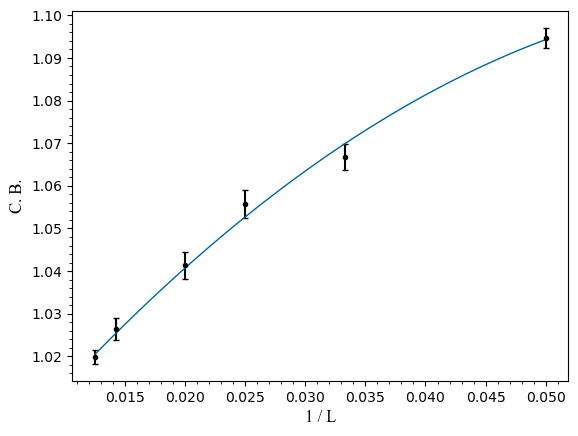

In [37]:

#data = np.loadtxt('/Users/monicacesario/Desktop/modulo1/binder_035_new.txt')  # Assumi che il file contenga tre colonne: x, y, errori

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Leggi i dati dal file
data = np.loadtxt('/Users/monicacesario/Desktop/modulo1/binder_045_new.txt')  # Assumi che il file contenga tre colonne: x, y, errori

# Estrai le colonne
x_data = 1 / data[:, 0]  # Inverso dei punti della prima colonna
y_data = data[:, 1]  # Seconda colonna come dati da fittare
errors = data[:, 2]  # Terza colonna come errori associati a y

def model_f(x, a, b, c):
    return a * (x**2) + b * x + c

# Esegui il fit
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[1.0, 1.0, 3.0], sigma=errors)

# Estrai i parametri e i relativi errori
a_opt, b_opt, c_opt = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

# Calcola il chi-quadro ridotto
residuals = y_data - model_f(x_data, a_opt, b_opt, c_opt)
chi_squared = np.sum((residuals / errors)**2)
dof = len(x_data) - len(popt)  # Gradi di libertà: numero dei dati meno numero dei parametri del fit
chi_squared_red = chi_squared / dof


# Impostazione font
font1 = {'family': 'Times New Roman', 'size': 15}
font2 = {'family': 'Times New Roman', 'size': 12}

# Stampa a schermo i parametri con gli errori e il chi-quadro ridotto
print(f'Parametri del fit:')
print(f'a = {a_opt} +/- {a_err}')
print(f'b = {b_opt} +/- {b_err}')
print(f'c = {c_opt} +/- {c_err}')
print(f'Chi-quadro ridotto = {chi_squared_red}')

# Crea il modello per il grafico
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

# Crea il grafico dei dati e del fit
plt.errorbar(x_data, y_data, yerr=errors, fmt='.', capsize = 2,color='black')
plt.plot(x_model, y_model, linewidth=1, color='#006699')

plt.xlabel('1 / L', fontdict=font2)
plt.ylabel('C. B.', fontdict=font2)

# Imposta le tacchette minori sugli assi
plt.minorticks_on()



# Mostra il grafico
plt.show()





